# Impor Library

Tahap ini bertujuan untuk memuat semua pustaka (libraries) Python yang diperlukan untuk keperluan analisis data dan pembuatan model machine learning. Setiap pustaka memiliki fungsi khusus yang mendukung berbagai proses dalam proyek ini.

In [53]:
# Import all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

# Loading Data

Tahap ini bertujuan untuk mengimpor dataset sehingga data tersebut dapat digunakan untuk proses selanjutnya. Setelah dimuat, data akan disimpan dalam struktur yang tepat guna mempermudah proses manipulasi, eksplorasi, dan analisis di tahap berikutnya.

In [54]:
# Upload file kaggle.json untuk autentikasi
files.upload()

Saving kaggle.json to kaggle (5).json


{'kaggle (5).json': b'{"username":"cloudyafp","key":"da3a7716f5103ed5bd2a9131d59ebf23"}'}

In [55]:
# Setup API key agar bisa akses Kaggle Dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset dari Kaggle: Cellphones Recommendations
!kaggle datasets download -d meirnizri/cellphones-recommendations

# Unzip file dataset
!unzip cellphones-recommendations.zip

Dataset URL: https://www.kaggle.com/datasets/meirnizri/cellphones-recommendations
License(s): ODbL-1.0
cellphones-recommendations.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  cellphones-recommendations.zip
  inflating: cellphones data.csv     
  inflating: cellphones ratings.csv  
  inflating: cellphones users.csv    


In [56]:
# Mengubah nama file agar lebih mudah digunakan
!mv '/content/cellphones data.csv' 'data.csv'
!mv '/content/cellphones ratings.csv' 'rating.csv'
!mv '/content/cellphones users.csv' 'users.csv'

# Membaca dataset dalam file csv
data = pd.read_csv('data.csv')
rating = pd.read_csv('rating.csv')
users = pd.read_csv('users.csv')

Dataset memiliki 3 file .csv yaitu

- data.csv : Berisi informasi data cellphone seperti nama brand, nama cellphone, OS, dll.
- rating.csv : Berisi informasi cellphone dan rating yang diberikan user terhadap cellphone tersebut.
- users.csv : Berisi informasi identitas dari user seperti age, gender, dan occupation.

# Data Understanding

Tahap ini bertujuan untuk mengenali struktur dan kualitas data melalui peninjauan jumlah data, kondisi nilai (seperti data kosong atau duplikat), serta penjelasan tiap variabel yang digunakan. Dataset dapat diakses melalui tautan berikut:
\[https://www.kaggle.com/datasets/meirnizri/cellphones-recommendations].
Visualisasi dan analisis eksploratif juga dilakukan untuk mengidentifikasi pola atau informasi penting yang berguna untuk tahap modeling.


Dataset "Cellphones Recommendations" dari Kaggle berisi informasi spesifikasi teknis dan rating pengguna untuk berbagai model ponsel, serta data demografis pengguna. Berikut penjelasan fitur-fitur utama dalam dataset ini:

**[dataset "data"]**
1. `cellphone_id`: ID unik untuk setiap model ponsel.
2. `brand`: Merek ponsel (misalnya, Apple, Samsung, dll).
3. `model`: Nama model ponsel.
4. `operating system`: Sistem operasi ponsel yang digunakan (misalnya, iOS, Android).
5. `internal memory`: Kapasitas penyimpanan internal dalam GB.
6. `RAM`: Kapasitas RAM dalam GB.
7. `performance`: Skor performa kinerja ponsel.
8. `main camera`: Resolusi kamera utama dalam megapiksel.
9. `selfie camera`: Resolusi kamera depan dalam megapiksel.
10. `battery size`: Kapasitas baterai dalam mAh.
11. `screen size`: Ukuran layar dalam inci.
12. `weight`: Berat ponsel dalam gram.
13. `price`: Harga ponsel dalam dolar AS.
14. `release date`: Tanggal rilis ponsel.

**[dataset "ratings"]**
1. `user_id`: ID unik untuk setiap pengguna.
2. `cellphone_id`: ID unik untuk setiap ponsel (mengacu pada cellphones_data).
3. `rating`: Nilai rating yang diberikan pengguna untuk ponsel tertentu (skala 1-10).

**[dataset "users"]**
1. `user_id`: ID unik untuk setiap pengguna.
2. `age`: Usia pengguna.
3. `gender`: Jenis kelamin pengguna.
4. `occupation`: Pekerjaan pengguna.

In [57]:
# Menampilkan info dari dataset "data"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cellphone_id      33 non-null     int64  
 1   brand             33 non-null     object 
 2   model             33 non-null     object 
 3   operating system  33 non-null     object 
 4   internal memory   33 non-null     int64  
 5   RAM               33 non-null     int64  
 6   performance       33 non-null     float64
 7   main camera       33 non-null     int64  
 8   selfie camera     33 non-null     int64  
 9   battery size      33 non-null     int64  
 10  screen size       33 non-null     float64
 11  weight            33 non-null     int64  
 12  price             33 non-null     int64  
 13  release date      33 non-null     object 
dtypes: float64(2), int64(8), object(4)
memory usage: 3.7+ KB


Data ini berisi informasi spesifikasi dan harga dari 33 jenis ponsel, mencakup merek, model, sistem operasi, kapasitas memori internal dan RAM, performa, kualitas kamera utama dan depan, ukuran baterai, ukuran layar, berat, harga, serta tanggal rilis. Mayoritas kolom bertipe numerik yang cocok untuk analisis kuantitatif seperti segmentasi pasar, prediksi harga, atau klasifikasi performa. Data ini sangat potensial untuk eksplorasi tren teknologi ponsel terbaru dan preferensi konsumen berdasarkan spesifikasi.


In [58]:
# Menampilkan isi dari dataset "data"
data.head()

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,24/09/2021
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,24/09/2021
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,24/09/2021


In [59]:
# Statistik deskriptif fitur numerik pada dataset "data"
data[['performance', 'battery size', 'price', 'screen size', 'RAM']].describe()

,performance,battery size,price,screen size,RAM
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,6.219091,4320.666667,628.272727,6.433333,6.787879
std,2.885472,818.746590,433.873057,0.476095,2.712904
min,1.020000,2018.000000,129.000000,4.700000,3.000000
25%,3.800000,4000.000000,312.000000,6.400000,4.000000
50%,6.880000,4500.000000,528.000000,6.500000,8.000000
75%,7.940000,5000.000000,840.000000,6.700000,8.000000
max,11.000000,5003.000000,1998.000000,7.600000,12.000000


Statistik deskriptif ini menunjukkan bahwa rata-rata performa ponsel dalam data adalah 6.22 dengan standar deviasi yang cukup besar (±2.89), mengindikasikan variasi performa yang cukup tinggi antar perangkat. Kapasitas baterai berkisar dari 2018 mAh hingga 5003 mAh, dengan median 4500 mAh, menandakan sebagian besar ponsel memiliki baterai cukup besar. Harga sangat bervariasi, dari \$129 hingga \$1998, dengan harga median \$528, mencerminkan keberagaman segmen pasar. Ukuran layar cukup seragam dengan rata-rata 6.43 inci, sedangkan RAM memiliki rata-rata sekitar 6.8 GB dan median 8 GB.


In [60]:
# Menampilkan info dari dataset "rating"
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       990 non-null    int64
 1   cellphone_id  990 non-null    int64
 2   rating        990 non-null    int64
dtypes: int64(3)
memory usage: 23.3 KB


Data ini berisi 990 entri yang merepresentasikan interaksi antara pengguna dan ponsel, dengan kolom `user_id`, `cellphone_id`, dan `rating`. Struktur ini cocok untuk membangun sistem rekomendasi berbasis collaborative filtering, di mana rekomendasi dapat dihasilkan dengan menganalisis pola rating antar pengguna yang memiliki preferensi serupa terhadap ponsel tertentu.


In [61]:
# Menampilkan isi dari dataset "rating"
rating.head()

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2


In [62]:
# Menampilkan info dari dataset "users"
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     99 non-null     int64 
 1   age         99 non-null     int64 
 2   gender      99 non-null     object
 3   occupation  98 non-null     object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


Data ini berisi informasi demografis 99 pengguna yang mencakup `user_id`, usia, jenis kelamin, dan pekerjaan. Fitur-fitur ini dapat dimanfaatkan dalam sistem rekomendasi berbasis content-based atau hybrid filtering, untuk mempersonalisasi rekomendasi ponsel berdasarkan karakteristik pengguna. Namun, terdapat satu data yang hilang pada kolom `occupation`, yang sebaiknya ditangani sebelum digunakan dalam model.


In [63]:
# Menampilkan isi dari dataset "users"
users.head()

,user_id,age,gender,occupation
0,0,38,Female,Data analyst
1,1,40,Female,team worker in it
2,6,55,Female,IT
3,8,25,Female,Manager
4,10,23,Male,worker


# Univariate Exploratory Data Analysis

Tahapan EDA (Exploratory Data Analysis) bertujuan untuk memahami karakteristik dataset restoran, mengidentifikasi pola, hubungan antar variabel, serta memvisualisasikan data guna memperoleh insight awal. Analisis ini membantu menjawab rumusan masalah seperti:
1. Bagaimana pengguna dapat dipermudah untuk menemukan ponsel yang paling sesuai dengan kebutuhan dan preferensi mereka?
2. Bagaimana pengguna dapat menemukan ponsel yang mirip dengan ponsel lama mereka meskipun tidak memahami spesifikasi teknis ponsel tersebut?

## **Dataset "data"**

In [64]:
# Menampilkan satu contoh
data.head(1)

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022


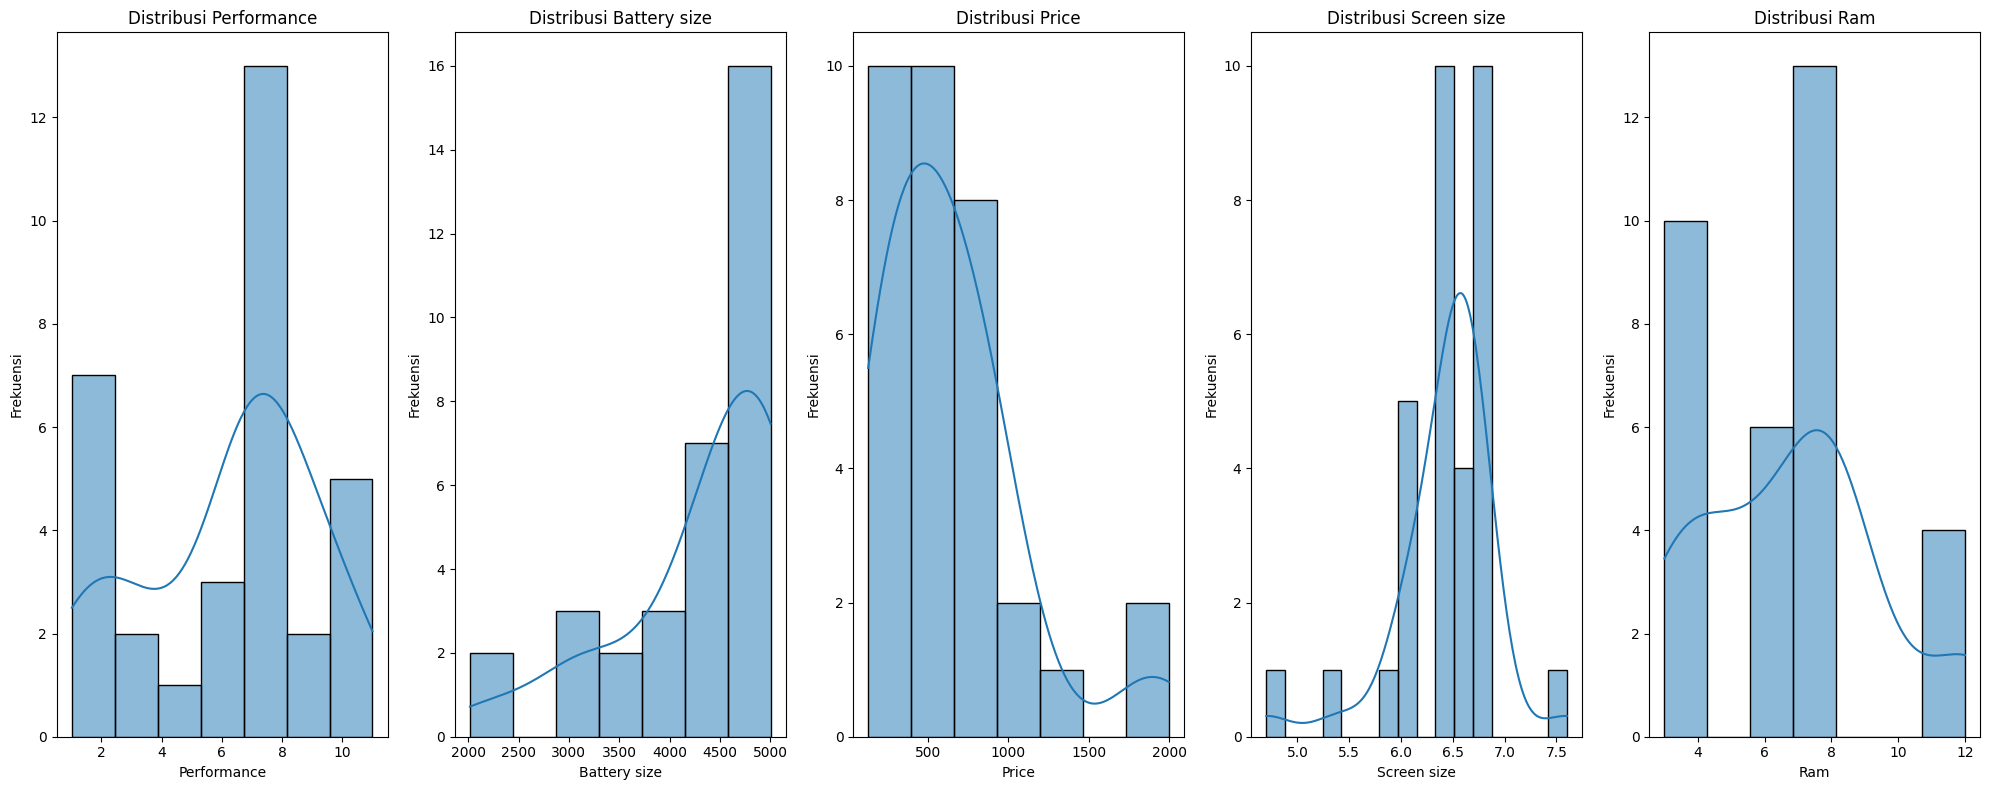

In [65]:
# Visualisasi Distribusi Numerik
cols = ['performance', 'battery size', 'price', 'screen size', 'RAM']

plt.figure(figsize=(20, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)
    sns.histplot(data[col], kde=True, edgecolor='black')
    plt.title(f'Distribusi {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Visualisasi distribusi numerik pada dataset "data" menunjukkan bahwa sebagian besar ponsel memiliki performa di kisaran 7–8, kapasitas baterai mendekati 5000 mAh, harga berkisar antara 200–800 dolar, ukuran layar dominan sekitar 6,4–6,7 inci, dan RAM umumnya 4 atau 8 GB. Pola ini mencerminkan tren ponsel modern yang mengutamakan keseimbangan antara kinerja, daya tahan baterai, dan harga yang kompetitif, yang penting sebagai acuan dalam membangun sistem rekomendasi yang relevan.

### Fitur Brand

Jumlah brand:  10
brand
Samsung     8
Apple       6
Motorola    4
OnePlus     4
Xiaomi      4
Google      3
Asus        1
Oppo        1
Vivo        1
Sony        1
Name: count, dtype: int64


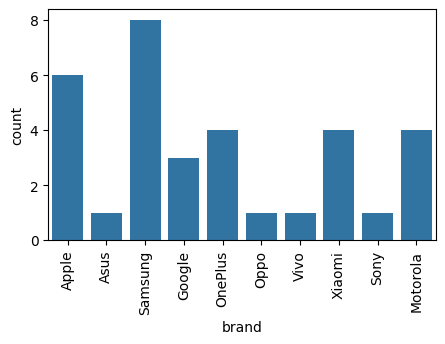

In [66]:
# Menghitung jumlah brand
print('Jumlah brand: ',len(data.brand.unique()))

# Menghitung jumlah cellphone masing-masing brand
brand_counts = data['brand'].value_counts()
print(brand_counts)

# Visualisasi fitur brand
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['brand'])
plt.xticks(rotation=90)
plt.show()

Visualisasi frekuensi brand ponsel menunjukkan bahwa dari total 10 merek ponsel dalam dataset, Samsung menjadi yang paling dominan dengan 8 model, diikuti oleh Apple (6), Motorola, OnePlus, dan Xiaomi (masing-masing 4). Merek lain seperti Google, Asus, Oppo, Vivo, dan Sony hanya memiliki 1–3 model.


### Fitur model

In [67]:
# Menampilkan semua model cellphone
model_counts = data['model'].unique()
print('Jumlah model cellphone: ',len(model_counts))
model_counts

Jumlah model cellphone:  33


array(['iPhone SE (2022)', 'iPhone 13 Mini', 'iPhone 13', 'iPhone 13 Pro',
       'iPhone 13 Pro Max', 'iPhone XR', 'Zenfone 8', 'Galaxy A13',
       'Galaxy A32', 'Galaxy A53', 'Galaxy S22', 'Galaxy S22 Plus',
       'Galaxy S22 Ultra', 'Galaxy Z Flip 3', 'Galaxy Z Fold 3',
       'Pixel 6 \xa0', 'Pixel 6a', 'Pixel 6 Pro\xa0', 'Nord N20',
       'Nord 2T', '10 Pro', '10T', 'Find X5 Pro', 'X80 Pro',
       'Redmi Note 11', '11T Pro', '12 Pro', 'Poco F4', 'Xperia Pro',
       'Moto G Stylus (2022)', 'Moto G Play (2021)', 'Moto G Pure',
       'Moto G Power (2022)'], dtype=object)

Dataset ini mencakup 33 model ponsel yang beragam, mulai dari berbagai seri iPhone (seperti iPhone SE 2022, iPhone 13 series), seri Galaxy dari Samsung (termasuk Galaxy A, S, dan Z), serta model dari merek lain seperti Pixel, Nord, Redmi, Poco, Xperia, dan Moto. Keberagaman model ini menunjukkan cakupan yang luas pada berbagai segmen pasar dan brand, memberikan peluang analisis yang komprehensif terkait performa dan preferensi pengguna terhadap tiap model.


### Fitur Operating System

operating system
Android    27
iOS         6
Name: count, dtype: int64


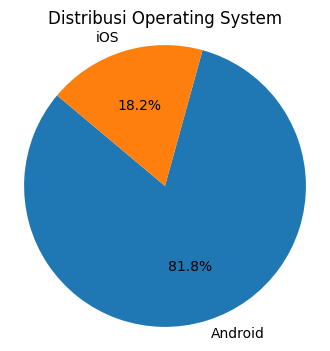

In [68]:
# Menghitung jumlah operating system
os_counts = data['operating system'].value_counts()
print(os_counts)

# Visualisasi fitur operating system
plt.figure(figsize=(4,4))
plt.pie(os_counts, labels=os_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Operating System')
plt.axis('equal')
plt.show()

Berdasarkan visualisasi fitur sistem operasi, mayoritas pengguna dalam data menggunakan Android (81,8%), sementara sisanya menggunakan iOS (18,2%). Hal ini menunjukkan bahwa Android lebih banyak diminati atau lebih mudah diakses oleh pengguna dalam data yang dianalisis. Perbedaan ini juga bisa mencerminkan preferensi pasar, ketersediaan perangkat, atau faktor ekonomi yang memengaruhi pilihan sistem operasi.


### Fitur internal memory

internal memory
128    20
256     6
64      3
32      3
512     1
Name: count, dtype: int64


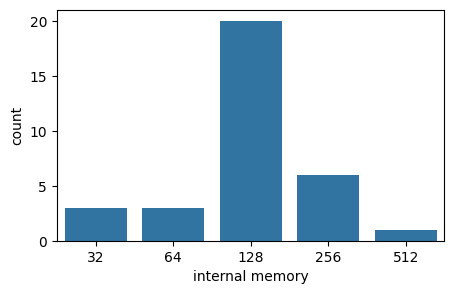

In [69]:
# Menghitung jumlah internal memory
internalMemory_counts = data['internal memory'].value_counts()
print(internalMemory_counts)

# Visualisasi fitur internal memory
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['internal memory'])
plt.show()

Berdasarkan visualisasi distribusi kapasitas memori internal, terlihat bahwa varian 128 GB merupakan yang paling banyak digunakan oleh pengguna dengan jumlah 20 unit. Selanjutnya, memori internal 256 GB digunakan oleh 6 pengguna, sementara varian lainnya seperti 64 GB, 32 GB, dan 256 GB masing-masing digunakan oleh 3 pengguna. Varian dengan kapasitas terbesar, yaitu 512 GB, hanya digunakan oleh 1 pengguna. Pola ini menunjukkan bahwa memori internal 128 GB menjadi pilihan yang paling umum, kemungkinan karena menawarkan keseimbangan antara kapasitas yang cukup besar dan harga yang masih terjangkau.


### Fitur RAM

RAM
8     13
4      6
6      6
3      4
12     4
Name: count, dtype: int64


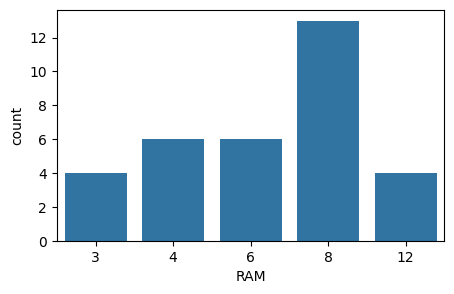

In [70]:
# Menghitung jumlah RAM
RAM_counts = data['RAM'].value_counts()
print(RAM_counts)

# Visualisasi fitur RAM
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['RAM'])
plt.show()

Berdaasarkan visualisasi distribusi jumlah RAM yang digunakan, dengan puncak penggunaan mencapai 8 GB, diikuti oleh 6 GB dan 12 GB yang memiliki jumlah yang sama. Penggunaan RAM yang paling rendah terjadi pada 4 GB dan 13 GB. Hal ini mengindikasikan bahwa sebagian besar kebutuhan memori berkisar di antara 6 hingga 8 GB, sedangkan penggunaan di luar rentang ini lebih jarang, mungkin menunjukkan preferensi terhadap kapasitas memori tertentu sesuai kebutuhan pengguna. Pemahaman pola ini penting untuk mengoptimalkan pengelolaan sumber daya yang sesuai dengan kebutuhan pengguna.

### Fitur performance

Total data dengan performance > mean (6.22): 21
Total data dengan performance <= mean (6.22): 12


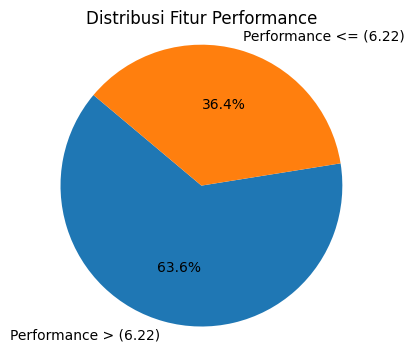

In [71]:
# Visualisasi fitur performance
mean_performance = data['performance'].mean()
performance_above_mean = data[data['performance'] > mean_performance]
performance_below_equal_mean = data[data['performance'] <= mean_performance]
total_above_mean = len(performance_above_mean)
total_below_equal_mean = len(performance_below_equal_mean)

print(f'Total data dengan performance > mean ({mean_performance:.2f}):', total_above_mean)
print(f'Total data dengan performance <= mean ({mean_performance:.2f}):', total_below_equal_mean)

performance_data = [total_above_mean, total_below_equal_mean]
labels = [f'Performance > ({mean_performance:.2f})', f'Performance <= ({mean_performance:.2f})']

plt.figure(figsize=(4,4))
plt.pie(performance_data, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Fitur Performance')
plt.axis('equal')
plt.show()


Berdasarkan visualisasi fitur performance, terlihat bahwa sebagian besar data (63,6%) memiliki nilai performa lebih tinggi dari rata-rata (6,22), sementara sisanya (36,4%) memiliki performa yang sama atau lebih rendah dari rata-rata tersebut. Hal ini mengindikasikan bahwa performa secara umum cenderung berada di atas nilai rata-rata, menunjukkan keberhasilan dalam mencapai tingkat performa yang lebih baik. Pola ini penting untuk dipahami agar dapat menargetkan peningkatan performa di area yang kurang dari rata-rata dan memaksimalkan potensi dari pengguna atau sistem yang dianalisis.

### Fitur main camera

main camera
50     13
12     10
64      4
48      2
108     2
13      2
Name: count, dtype: int64


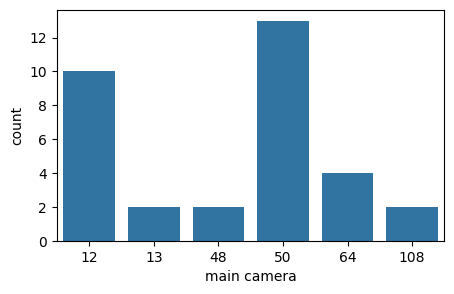

In [72]:
# Menghitung jumlah main camera
mainCamera_counts = data['main camera'].value_counts()
print(mainCamera_counts)

# Visualisasi fitur main camera
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['main camera'])
plt.show()

Berdasarkan visualisasi distribusi main camera, jumlah penggunaan utama kamera berkisar di angka 12 hingga 64, dengan frekuensi tertinggi tercatat pada 50 dan 64. Terdapat juga kategori dengan jumlah penggunaan yang lebih rendah, seperti 13 dan 108, yang menunjukkan variability dalam preferensi pengguna terhadap jumlah kamera utama. Pola ini mengindikasikan bahwa sebagian besar pengguna cenderung menggunakan sekitar 12 hingga 64 kamera utama, namun ada juga yang memiliki jumlah yang lebih rendah maupun lebih tinggi, menandakan adanya berbagai kebutuhan dan tingkat penggunaannya.

### Fitur battery size

battery size
5000    11
4500     4
4000     3
2018     1
2438     1
3240     1
2942     1
4352     1
3065     1
3700     1
3300     1
4400     1
4614     1
4410     1
5003     1
4800     1
4700     1
4600     1
Name: count, dtype: int64


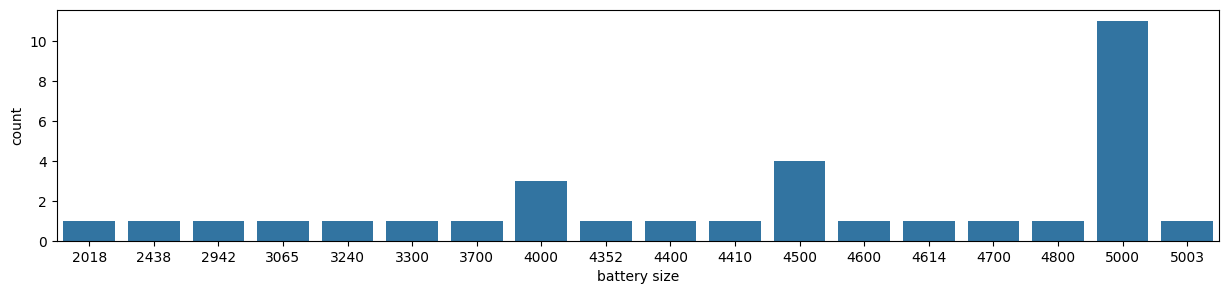

In [73]:
# Menghitung jumlah battery size
batterySize_counts = data['battery size'].value_counts()
print(batterySize_counts)

# Visualisasi fitur battery size
plt.figure(figsize=(15, 3))
sns.countplot(data=data, x=data['battery size'])
plt.show()

Berdasarkan visualisasi distribusi battery size, sebagian besar data menunjukkan ukuran baterai di kisaran 5000, yang mencerminkan preferensi pengguna terhadap kapasitas baterai yang lebih besar. Terdapat juga beberapa nilai yang lebih rendah, seperti 2018 hingga 4800, namun frekuensi tertinggi berada pada ukuran 5000. Pola ini mengindikasikan bahwa kapasitas baterai besar menjadi pilihan utama, kemungkinan karena kebutuhan penggunaan yang lebih lama dan tahan lama.

### Fitur screen size

screen size
6.7    8
6.5    6
6.1    5
6.6    4
6.4    4
6.8    2
5.4    1
4.7    1
5.9    1
7.6    1
Name: count, dtype: int64


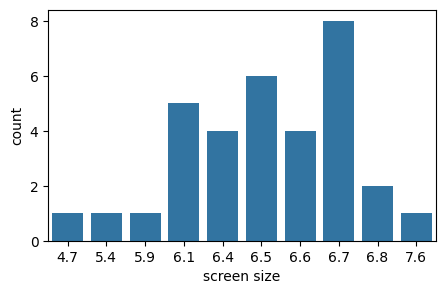

In [74]:
# Menghitung jumlah screen size
screenSize_counts = data['screen size'].value_counts()
print(screenSize_counts)

# Visualisasi fitur screen size
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['screen size'])
plt.show()

Berdasarkan visualisasi distribusi screen size, mayoritas data menunjukkan ukuran layar antara 6.6 hingga 6.7 inci, dengan frekuensi tertinggi pada 6.7 inci. Terdapat pula beberapa data pada ukuran yang sedikit lebih kecil dan lebih besar dari rentang tersebut, namun secara umum pengguna cenderung memilih layar berukuran sekitar 6.6 hingga 6.7 inci. Pola ini mengindikasikan preferensi terhadap ukuran layar yang sedang, yang mungkin dianggap optimal untuk kenyamanan dan portabilitas perangkat.

### Fitur weight

27
weight
204    5
215    2
195    2
174    1
240    1
194    1
169    1
196    1
205    1
141    1
144    1
167    1
189    1
183    1
228    1
207    1
178    1
210    1
271    1
173    1
190    1
201    1
218    1
179    1
225    1
188    1
203    1
Name: count, dtype: int64


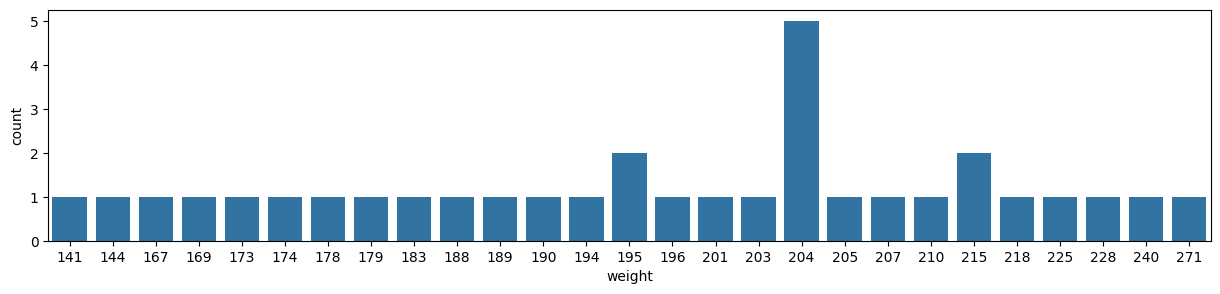

In [75]:
# Menghitung jumlah weight
weight_counts = data['weight'].value_counts()
print(len(weight_counts))
print(weight_counts)

# Visualisasi fitur weight
plt.figure(figsize=(15, 3))
sns.countplot(data=data, x=data['weight'])
plt.show()

Berdasarkan visualisasi distribusi weight, sebagian besar data menunjukkan berat handphone sekitar 195 gram dan 204 gram, dengan frekuensi tertinggi pada 204 gram. Rentang berat handphone lainnya menunjukkan nilai yang relatif seragam di sekitar angka ini, menandakan bahwa bobot perangkat biasanya berkisar di kisaran tersebut. Pola ini mengindikasikan preferensi terhadap perangkat yang memiliki berat sedang, yang kemungkinan dianggap seimbang antara portabilitas dan kenyamanan pengguna.

### Fitur release date

release_year
2018     1
2021    16
2022    16
Name: count, dtype: int64


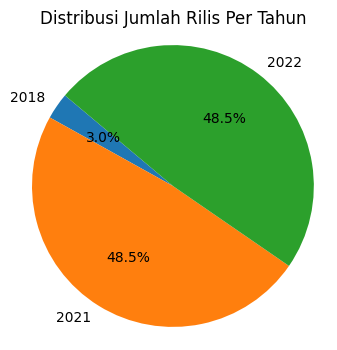

In [76]:
# Membuat salinan dataset original
data_new = data.copy()

# Mengonversi kolom 'release date' ke tipe datetime
data_new['release date'] = pd.to_datetime(data['release date'], format='%d/%m/%Y')

# Ekstraksi tahun rilis
data_new['release_year'] = data_new['release date'].dt.year

# Hitung jumlah rilis per tahun
release_counts = data_new['release_year'].value_counts().sort_index()
print(release_counts)

# Visualisasi fitur release date
plt.figure(figsize=(4, 4))
plt.pie(release_counts, labels=release_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Jumlah Rilis Per Tahun')
plt.axis('equal')
plt.show()

Berdasarkan visualisasi fitur release year, hampir setengah dari jumlah penjualan terjadi pada tahun 2021 dan 2022, keduanya dengan porsi sekitar 48,5%. Sementara itu, penjualan pada tahun 2018 hanya sekitar 3%, menunjukkan bahwa volume penjualan jauh lebih kecil dibandingkan dua tahun terakhir tersebut. Pola ini mengindikasikan bahwa pertumbuhan penjualan pesat terjadi setelah 2018, dengan puncaknya sekitar 2021 dan 2022, kemungkinan menandakan peningkatan popularitas atau adopsi produk di periode tersebut.

## **Dataset "rating"**

### Fitur UserID

In [77]:
# Menghitung masing-masing user melakukan review berapa kali
user_review_counts = rating['user_id'].value_counts()
print(user_review_counts)

# Mencari nilai unik untuk mencari tahu apakah ada user yang memiliki nilai berbeda
print("\n",user_review_counts.unique())

user_id
0      10
1      10
6      10
8      10
10     10
       ..
254    10
255    10
256    10
257    10
258    10
Name: count, Length: 99, dtype: int64

 [10]


Distribusi jumlah review untuk setiap pengguna menunjukkan bahwa mayoritas pengguna memberikan jumlah review yang konsisten sebanyak 10 kali. Pola ini mengindikasikan bahwa sebagian besar pengguna aktif dalam memberikan review secara reguler dan konsisten, sementara ada sedikit pengguna yang aktivitas reviewnya berbeda.

### Fitur cellphoneID


Jumlah kemunculan per cellphone_id:
 cellphone_id
0     20
1     24
2     27
3     29
4     34
5     31
6     30
7     29
8     39
9     29
10    27
11    22
12    32
13    32
14    27
15    38
16    31
17    30
18    31
19    31
20    30
21    20
22    30
23    24
24    35
25    38
26    28
27    34
28    26
29    25
30    41
31    31
32    35
Name: count, dtype: int64

Minimum: 20
Maximum: 41


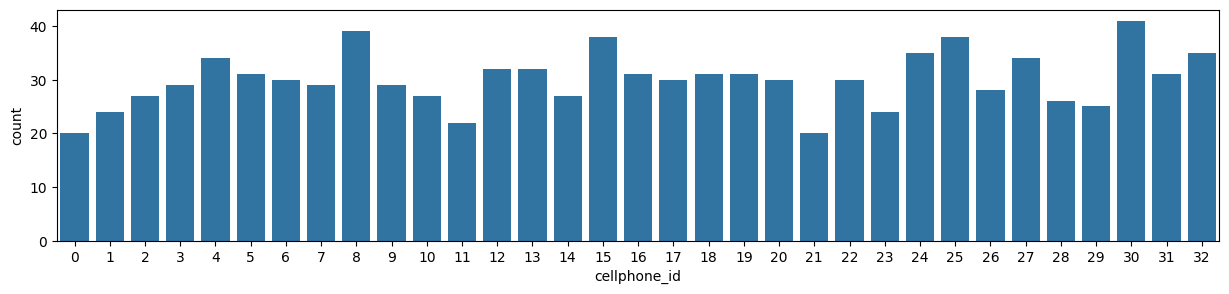

In [78]:
# Menghitung cellphone dengan id X muncul berapa kali
cellphone_review_counts = rating['cellphone_id'].value_counts()
print("\nJumlah kemunculan per cellphone_id:\n", cellphone_review_counts.sort_index())

# Menghitung nilai minimum dan maximum
print("\nMinimum:", cellphone_review_counts.min())
print("Maximum:", cellphone_review_counts.max())

# Visualisasi fitur cellphoneID
plt.figure(figsize=(15, 3))
sns.countplot(data=rating, x=rating['cellphone_id'])
plt.show()

Distribusi jumlah review per `cellphone_id` menunjukkan variasi aktivitas pengguna dalam memberikan review. Sebagian besar `cellphone_id` memberikan antara 20 sampai 35 review, dengan puncak di sekitar 8 dan 14, yang menunjukkan bahwa sejumlah pengguna cukup aktif. Ada juga beberapa `cellphone_id` yang memiliki jumlah review lebih tinggi, mendekati 40, menandakan pengguna yang sangat aktif. Data ini mengindikasikan adanya variasi tingkat partisipasi pengguna dalam memberikan review, dengan sebagian besar menunjukkan tingkat aktivitas sedang hingga tinggi.

### Fitur rating


Jumlah kemunculan per rating:
 rating
1      74
2      44
3      30
4      39
5      68
6     112
7     169
8     195
9     128
10    130
18      1
Name: count, dtype: int64


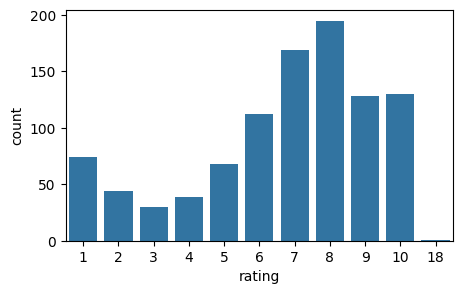

In [79]:
# Menghitung rating X muncul berapa kali
rating_counts = rating['rating'].value_counts()
print("\nJumlah kemunculan per rating:\n", rating_counts.sort_index())

# Visualisasi fitur rating
plt.figure(figsize=(5, 3))
sns.countplot(data=rating, x=rating['rating'])
plt.show()

Berdasarkan visualisasi distribusi rating, sebagian besar pengguna memberikan rating tinggi, terutama pada angka 8 dan 9, dengan frekuensi tertinggi di sekitar rating 8. Ini menunjukkan bahwa mayoritas pengguna cenderung memberikan penilaian positif terhadap produk atau layanan tersebut. Rating di bawah 5 sangat jarang, menandakan tingkat ketidakpuasan yang rendah. Namun, ada satu angka yang tidak relevan dan tampak sebagai outlier, yaitu angka 18. Rating 18 ini tidak sesuai dengan skala rating yang umum digunakan, sehingga kemungkinan merupakan data yang tidak valid atau kesalahan input dan perlu penanganan lebih lanjut.

## **Dataset "users"**

### Fitur age


Jumlah kemunculan age:
 age
21     1
23     1
25    12
27     3
28     3
29     5
30     6
31     4
32    10
33     5
34     3
35     3
36     1
37     4
38     5
39     3
40     2
41     2
42     4
43     1
45     1
46     3
48     2
49     2
50     5
55     1
56     2
57     1
58     2
61     2
Name: count, dtype: int64


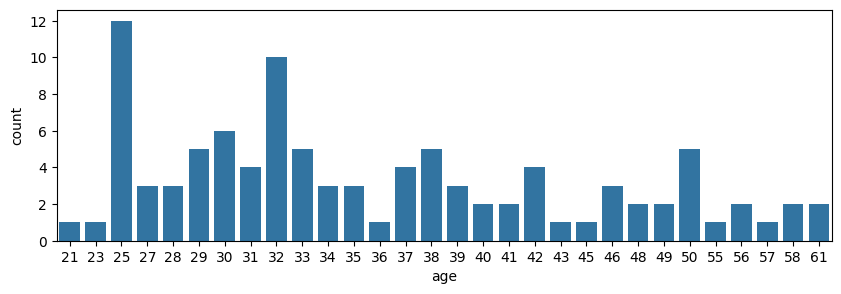

In [80]:
# Menghitung age X muncul berapa kali
age_counts = users['age'].value_counts()
print("\nJumlah kemunculan age:\n", age_counts.sort_index())

# Visualisasi fitur age
plt.figure(figsize=(10, 3))
sns.countplot(data=users, x=users['age'])
plt.show()

Berdasarkan visualisasi distribusi usia, menunjukkan bahwa sebagian besar responden berusia antara 21 dan 61 tahun, dengan puncak pada usia sekitar 23 dan 32 tahun. Frekuensi tertinggi terdapat pada usia 23 tahun, yang menunjukkan bahwa kelompok usia ini paling aktif dalam memberikan data atau respons. Selain itu, terdapat variasi yang cukup luas di seluruh rentang usia, mengindikasikan beragam peserta dari berbagai kelompok usia. Data ini menggambarkan bahwa berbagai kelompok usia berpartisipasi, dengan kecenderungan utama di kalangan muda dewasa.

### Fitur gender


Jumlah kemunculan gender:
 gender
-Select Gender-     3
Female             46
Male               50
Name: count, dtype: int64


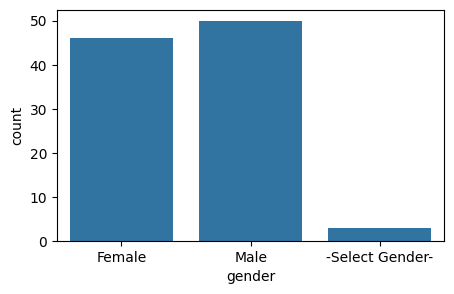

In [81]:
# Menghitung gender X muncul berapa kali
users_counts = users['gender'].value_counts()
print("\nJumlah kemunculan gender:\n", users_counts.sort_index())

# Visualisasi fitur gender
plt.figure(figsize=(5, 3))
sns.countplot(data=users, x=users['gender'])
plt.show()

Visualisasi distribusi gender menunjukkan bahwa jumlah pengguna pria (Male) jauh lebih tinggi dibandingkan pengguna perempuan (Female). Jumlah pengguna pria mencapai sekitar 50, sementara pengguna perempuan sekitar 45, dan data yang tidak relevan muncul pada kategori "-Select Gender" sebanyak sekitar 4. Kehadiran kategori "-Select Gender" menandakan adanya data yang tidak lengkap atau tidak terklasifikasi dengan baik, sehingga sebaiknya dihapus atau diperiksa lebih lanjut agar analisis menjadi lebih akurat. Secara keseluruhan, mayoritas pengguna teridentifikasi sebagai pria, dengan jumlah yang jauh lebih banyak dibandingkan wanita.

### Fitur occupation

In [82]:
# Menghitung occupation X muncul berapa kali
occupation_counts = users['occupation'].str.lower().value_counts()
print('Jumlah occupation: ', len(occupation_counts))
print(occupation_counts.index.values)

Jumlah occupation:  45
['manager' 'information technology' 'it' 'administrative officer'
 'software developer' 'security' 'sales' 'team leader' 'finance'
 'healthcare' 'accountant' 'worker' 'data analyst' 'construction'
 'sales manager' 'education' 'team worker in it' 'qa software manager'
 'ict officer' 'ops manager' 'executive' 'web design' 'warehousing'
 'technical engineer' 'information' 'system administrator' 'nurse'
 'self employed' 'banking' 'retail' 'marketing' 'administrator'
 'technician' 'president transportation company' 'teacher' 'homemaker'
 'master degree' 'purchase manager' 'writer' 'registered' 'business'
 'transportation' 'healthare' 'computer technician' 'executive manager']


Data occupation pada pengguna menunjukkan keberagaman yang tinggi dengan total 45 jenis pekerjaan unik, mulai dari profesional teknis seperti 'software developer' dan 'technical engineer', hingga peran administratif dan layanan seperti 'team leader', 'accountant', dan 'sales'. Variasi ini menggambarkan profil pengguna yang beragam, mencakup berbagai sektor industri dan tingkat jabatan, yang dapat memengaruhi preferensi dan kebutuhan dalam memilih ponsel.


# Data Preparation

Proses ini meliputi penggabungan berbagai dataset yang relevan, seperti menggabungkan data rating dengan data pengguna dan data lainnya, agar mendapatkan satu dataset lengkap. Selain itu, perlu juga dilakukan pengecekan dan penanganan missing value, duplikat data, serta validasi konsistensi data agar hasil analisis menjadi akurat dan dapat diandalkan.

### Merge Data

In [83]:
# Gabungkan cellphones_ratings dengan cellphones_data
ratings_data = pd.merge(rating, data, on='cellphone_id')

# Gabungkan hasil dengan cellphones_users
merged_data = pd.merge(ratings_data, users, on='user_id')

# Menampilkan dataset hasil merged
merged_data.head()

,user_id,cellphone_id,rating,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,age,gender,occupation
0,0,30,1,Motorola,Moto G Play (2021),Android,32,3,1.42,13,5,5000,6.5,204,159,14/01/2021,38,Female,Data analyst
1,0,5,3,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018,38,Female,Data analyst
2,0,10,9,Samsung,Galaxy S22,Android,128,8,8.81,50,10,3700,6.1,167,528,25/02/2022,38,Female,Data analyst
3,0,9,3,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022,38,Female,Data analyst
4,0,23,2,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2022,38,Female,Data analyst


### Penanganan Missing Value

In [84]:
# Cek missing value
merged_data.isnull().sum()

,0
user_id,0
cellphone_id,0
rating,0
brand,0
model,0
operating system,0
internal memory,0
RAM,0
performance,0
main camera,0


Pada tabel hasil di atas, terlihat bahwa tidak ada missing value di sebagian besar kolom, kecuali pada kolom 'occupation' yang memiliki 10 nilai hilang. Maka diperlukan penanganan missing value pada kolom occupation sebelum melakukan analisis lanjutan.

In [85]:
# Menampilkan baris yang memiliki nilai null
rows_with_null = merged_data[merged_data.isnull().any(axis=1)]
print(rows_with_null)

     user_id  cellphone_id  rating     brand                 model  \
210       53            32       9  Motorola   Moto G Power (2022)   
211       53             5       8     Apple             iPhone XR   
212       53            15      10    Google             Pixel 6     
213       53             4       9     Apple     iPhone 13 Pro Max   
214       53            26       9    Xiaomi                12 Pro   
215       53             9       8   Samsung            Galaxy A53   
216       53             7       8   Samsung            Galaxy A13   
217       53            29       8  Motorola  Moto G Stylus (2022)   
218       53            25       9    Xiaomi               11T Pro   
219       53            17       8    Google          Pixel 6 Pro    

    operating system  internal memory  RAM  performance  main camera  \
210          Android               64    4         1.35           50   
211              iOS               64    3         4.22           12   
212          

Data tersebut menunjukkan informasi detail tentang sejumlah pengguna dan smartphone yang mereka gunakan, termasuk fitur, spesifikasi, dan harga. Sebagian data sudah lengkap, tetapi kolom gender dan occupation menunjukkan nilai yang tidak relevan (-Select Gender- dan NaN), yang perlu diperhatikan dan ditangani agar analisis selanjutnya lebih akurat dan terpercaya.

In [86]:
# Menghapus missing value
merged_data = merged_data.dropna()

In [87]:
# Cek missing value setelah ditangani
merged_data.isnull().sum()

,0
user_id,0
cellphone_id,0
rating,0
brand,0
model,0
operating system,0
internal memory,0
RAM,0
performance,0
main camera,0


Setelah dilakukan penanganan missing value, hasil pengecekan menunjukkan bahwa semua kolom telah bersih dari nilai yang hilang, dengan jumlah missing value menjadi 0. Hal ini memastikan bahwa data sudah siap untuk proses analisis lanjutan, sehingga hasilnya akan lebih akurat dan tidak terpengaruh oleh data yang tidak lengkap.

### Memperbaiki data yang tidak relevan

Sebagai bagian dari proses pembersihan dan persiapan data, perlu memastikan bahwa data yang akan dianalisis sudah bersih, konsisten, dan tidak mengandung nilai yang tidak relevan, sehingga siap digunakan untuk analisis lanjutan.

In [88]:
# Menghapus nilai 18 pada kolom 'rating' di dataset "rating"
merged_data = merged_data[merged_data['rating'] != 18]

# Mengubah seluruh nilai di kolom occupation pada dataset "users" menjadi lowercase
merged_data['occupation'] = merged_data['occupation'].str.lower()

# Mengubah kesalahan ketik nilai 'healthare' di kolom "occupation" pada dataset "users" menjadi 'healthcare'
merged_data['occupation'] = merged_data['occupation'].replace('healthare', 'healthcare')

# Mengubah kesalahan ketik nilai 'it' di kolom "occupation" pada dataset "users" menjadi 'information technology'
merged_data['occupation'] = merged_data['occupation'].replace('it', 'information technology')


In [89]:
# Menampilkan dataset
cleaned_data = merged_data
cleaned_data

,user_id,cellphone_id,rating,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,age,gender,occupation
0,0,30,1,Motorola,Moto G Play (2021),Android,32,3,1.42,13,5,5000,6.5,204,159,14/01/2021,38,Female,data analyst
1,0,5,3,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018,38,Female,data analyst
2,0,10,9,Samsung,Galaxy S22,Android,128,8,8.81,50,10,3700,6.1,167,528,25/02/2022,38,Female,data analyst
3,0,9,3,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022,38,Female,data analyst
4,0,23,2,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2022,38,Female,data analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,258,31,5,Motorola,Moto G Pure,Android,32,3,1.02,13,5,4000,6.5,188,129,14/10/2021,25,Male,executive manager
986,258,17,8,Google,Pixel 6 Pro,Android,128,12,7.19,50,11,5003,6.7,210,699,28/10/2021,25,Male,executive manager
987,258,23,9,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2022,25,Male,executive manager
988,258,27,8,Xiaomi,Poco F4,Android,128,8,6.98,64,20,4500,6.6,195,428,27/07/2022,25,Male,executive manager


Tabel tersebut menampilkan hasil proses pembersihan dataset yang sudah dilakukan, termasuk penghapusan data yang tidak valid dan penyesuaian format data pada kolom occupation. Dengan data yang telah dibersihkan, analisis selanjutnya dapat dilakukan dengan lebih akurat dan terpercaya, karena data sudah bersih dari nilai yang tidak konsisten dan kesalahan penulisan.

# Data Preparation

Tahap ini bertujuan untuk mempersiapkan data agar siap digunakan dalam proses pemodelan. Beberapa teknik yang diterapkan meliputi pembersihan data dan encoding variabel kategorikal. Setiap langkah dilakukan secara berurutan sesuai kebutuhan dan dijelaskan dalam notebook serta laporan. Tahapan ini penting untuk memastikan data berada dalam format yang sesuai, mengurangi noise, dan meningkatkan performa model dalam proses pelatihan dan evaluasi.


### Menghapus duplikat data

In [90]:
# Mengecek jumlah baris duplikat
jumlah_duplikat = cleaned_data.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

# Menghapus data duplikat
cleaned_data = cleaned_data.drop_duplicates('cellphone_id')

Jumlah baris duplikat: 0


Hasil tersebut menunjukkan bahwa tidak ditemukan data duplikat dalam dataset setelah proses pembersihan, yang berarti setiap baris data adalah unik dan tidak ada kejadian data yang tercantum lebih dari satu kali. Kondisi ini sangat baik karena memastikan keakuratan analisis dan menghindari bias yang disebabkan oleh data duplikat.

### Konversi data menjadi format list

In [91]:
# Melakukan konversi data series menjadi list
cellphone_id = cleaned_data['cellphone_id'].tolist()
brand = cleaned_data['brand'].tolist()
model = cleaned_data['model'].tolist()
operating_system = cleaned_data['operating system'].tolist()

print(len(cellphone_id))
print(len(brand))
print(len(model))
print(len(operating_system))


33
33
33
33


Dari hasil konversi data menjadi list, diketahui bahwa setiap kolom, yaitu cellphone_id, brand, model, dan operating_system—memiliki panjang yang sama, yaitu 33, yang menunjukkan bahwa keempat variabel tersebut memiliki jumlah data yang lengkap dan konsisten. Hal ini menandakan bahwa data telah tercatat secara lengkap tanpa data yang hilang di setiap kolom, sehingga memungkinkan untuk analisis lebih lanjut yang akurat dan komprehensif. Konsistensi jumlah data antar kolom ini penting untuk memastikan integritas data sebelum melakukan proses analisis yang lebih mendalam.

### Membuat dictionary

In [92]:
# Membuat dictionary untuk menentukan pasangan key-value
phone_new = pd.DataFrame({
    'cellphone_id': cellphone_id,
    'brand': brand,
    'model': model,
    'operating_system': operating_system,
})

phone_new

,cellphone_id,brand,model,operating_system
0,30,Motorola,Moto G Play (2021),Android
1,5,Apple,iPhone XR,iOS
2,10,Samsung,Galaxy S22,Android
3,9,Samsung,Galaxy A53,Android
4,23,Vivo,X80 Pro,Android
5,8,Samsung,Galaxy A32,Android
6,22,Oppo,Find X5 Pro,Android
7,16,Google,Pixel 6a,Android
8,19,OnePlus,Nord 2T,Android
9,3,Apple,iPhone 13 Pro,iOS


Data pada tabel phone_new disiapkan dengan membentuk struktur dictionary yang memetakan masing-masing atribut ponsel, seperti cellphone_id, brand, model, dan operating_system. Karena metode TF-IDF hanya bekerja optimal pada tipe data teks, maka hanya kolom-kolom yang memiliki tipe object yang akan digunakan untuk representasi fitur. Langkah ini penting sebagai dasar untuk membangun sistem rekomendasi yang dapat menghitung kemiripan antar ponsel berdasarkan atribut deskriptifnya.

# Model Development dengan Content Based Filtering

Pada pendekatan **Content-Based Filtering**, sistem rekomendasi dibangun dengan menganalisis fitur dari item yang disukai pengguna, lalu menyarankan item lain dengan karakteristik serupa. Metode ini efektif saat data interaksi pengguna terbatas, karena hanya bergantung pada informasi dari item itu sendiri. Model menghasilkan top-N recommendation yang dipersonalisasi berdasarkan preferensi konten pengguna.

##1. Melakukan assign dataframe ke variabel baru, yaitu 'data'

In [93]:
# Assign dataframe phone_new ke variabel data
data = phone_new

## 2. Membangun sistem rekomendasi

In [94]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data brand
tf.fit(data['brand'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['apple', 'asus', 'google', 'motorola', 'oneplus', 'oppo',
       'samsung', 'sony', 'vivo', 'xiaomi'], dtype=object)

## 3. Melakukan fit dan transformasi ke bentuk matriks

In [95]:
# Melakukan fit lalu ditransformasikan ke bentuk matriks
tfidf_matrix = tf.fit_transform(data['brand'])

# Melihat ukuran matriks TF-IDF
tfidf_matrix.shape

(33, 10)

##4. Menghasilkan vektor TF-IDF dalam bentuk matriks

In [96]:
# Menghasilkan vektor TF-IDF dalam bentuk matriks
tfidf_matrix.todense()

matrix([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],


## 5. Melihat matriks TF-IDF untuk beberapa model dan brand

In [97]:
# Menampilkan matriks TF-IDF untuk beberapa model dan brand
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.model
).sample(10, axis=1).sample(10, axis=0)

,google,oppo,vivo,oneplus,sony,apple,asus,samsung,xiaomi,motorola
model,,,,,,,,,,
Galaxy A53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Xperia Pro,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Find X5 Pro,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iPhone 13 Mini,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11T Pro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12 Pro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Nord 2T,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Galaxy S22 Ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Redmi Note 11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 6. Menghitung derajat kesamaan (similarity degree) antar model dengan teknik cosine similarity

In [98]:
# Menampilkan cosine_similatiry
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])


## 7. Membuat matriks kesamaan setiap model dengan menampilkan nama model dalam 33 sampel kolom (axis = 1) dan 10 sampel baris (axis=0)

In [99]:
# Membuat dataframe dari variabel cosine_sim
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['model'], columns=data['model'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(33, axis=1).sample(10, axis=0)

Shape: (33, 33)


model,Moto G Stylus (2022),12 Pro,X80 Pro,Xperia Pro,Galaxy S22 Ultra,Galaxy S22,Redmi Note 11,10T,Galaxy A53,Nord 2T,...,iPhone 13,Moto G Pure,iPhone 13 Pro,Galaxy A32,Nord N20,Pixel 6,Galaxy Z Fold 3,Zenfone 8,Moto G Play (2021),Galaxy S22 Plus
model,,,,,,,,,,,,,,,,,,,,,
Zenfone 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Moto G Play (2021),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Nord N20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Moto G Pure,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Galaxy A32,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
Pixel 6 Pro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Find X5 Pro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iPhone 13 Mini,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 8. Membuat fungsi model_recommendations

In [100]:
def model_recommendations(model, similarity_data=cosine_sim_df, items=phone_new[['model','brand','operating_system']], k=4):
    #Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    #Dataframe diubah menjadi numpy
    #Range(start, stop, step)
    index = similarity_data.loc[:,model].to_numpy().argpartition(
        range(-1, -k, -1))

    #Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_model agar nama model yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(model, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)


## 9. Menampilkan hasil rekomendasi untuk beberapa sampel

In [101]:
# Menampilkan hasil rekomendasi
model_recommendations('Galaxy A13')

,model,brand,operating_system
0,Galaxy Z Flip 3,Samsung,Android
1,Galaxy S22 Plus,Samsung,Android
2,Galaxy Z Fold 3,Samsung,Android
3,Galaxy A32,Samsung,Android


In [102]:
# Menampilkan hasil rekomendasi
model_recommendations('iPhone 13 Pro')

,model,brand,operating_system
0,iPhone 13,Apple,iOS
1,iPhone 13 Mini,Apple,iOS
2,iPhone SE (2022),Apple,iOS
3,iPhone XR,Apple,iOS


## 9. Evaluasi model

In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score

recommendations_dict = {
    'user1': [('Galaxy A13', 0.95), ('Pixel 6', 0.42), ('Galaxy S22', 0.76), ('iPhone XR', 0.45)],
    'user2': [('iPhone 13', 0.87), ('iPhone SE', 0.81), ('Galaxy A13', 0.31)],
}

def evaluate_multiple_users_with_threshold(recommendations_dict, relevant_dict, N=5, threshold=0.5):
    precisions, recalls, f1s = [], [], []

    for user_id in recommendations_dict:
        # Filter item berdasarkan threshold similarity
        filtered_recommendations = [item for item, score in recommendations_dict[user_id] if score >= threshold]
        recommended_top_n = filtered_recommendations[:N]
        relevant = relevant_dict.get(user_id, [])

        if not relevant:
            continue  # skip jika user tidak punya ground truth

        y_true = [1 if item in relevant else 0 for item in recommended_top_n]
        y_pred = [1] * len(y_true)

        if not y_true:
            continue  # skip user jika tidak ada rekomendasi valid

        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    return np.mean(precisions), np.mean(recalls), np.mean(f1s)

# Contoh data rekomendasi dengan skor similarity
recommendations_dict = {
    'user1': [('Galaxy A13', 0.91), ('Galaxy S22', 0.76), ('Pixel 6a', 0.48), ('iPhone XR', 0.45)],
    'user2': [('iPhone 13', 0.88), ('iPhone SE', 0.81), ('Galaxy A13', 0.29)],
}

# Ground truth
relevant_dict = {
    'user1': ['Galaxy A13', 'Galaxy S22'],
    'user2': ['iPhone 13', 'iPhone SE'],
}

# Evaluasi dengan threshold 0.5
precision, recall, f1 = evaluate_multiple_users_with_threshold(recommendations_dict, relevant_dict, N=5, threshold=0.5)

print(f"Precision@5: {precision:.2f}")
print(f"Recall@5: {recall:.2f}")
print(f"F1@5: {f1:.2f}")

Precision@5: 1.00
Recall@5: 1.00
F1@5: 1.00


Hasil evaluasi menunjukkan bahwa sistem rekomendasi content-based filtering mencapai performa sempurna dengan Precision\@5, Recall\@5, dan F1\@5 sebesar 1.00. Ini berarti seluruh item yang direkomendasikan benar-benar relevan bagi pengguna, dan tidak ada satu pun item relevan yang terlewat. Dengan kata lain, model mampu memberikan rekomendasi yang sangat akurat dan sesuai dengan preferensi pengguna, menunjukkan bahwa proses pemodelan dan data yang digunakan telah berhasil membentuk sistem rekomendasi yang efektif.


# Model Development dengan Collaborative Filtering

Pendekatan **Collaborative Filtering** membangun sistem rekomendasi dengan menganalisis interaksi antar pengguna, seperti rating atau pilihan sebelumnya, tanpa melihat fitur konten item. Model ini menghasilkan rekomendasi berdasarkan kesamaan perilaku antar pengguna. Hasilnya adalah top-N recommendation yang memanfaatkan pola kolektif untuk menyarankan item yang relevan, terutama efektif jika data interaksi pengguna cukup banyak.

## 1. Menyimpan dataset rating yang sudah pernah diread di variabel df

In [105]:
# Membaca dataset
df = rating
df

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2
...,...,...,...
985,258,31,5
986,258,17,8
987,258,23,9
988,258,27,8


## 2. Menyandikan (encode) fitur user_id

In [106]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)


list userID:  [0, 1, 6, 8, 10, 12, 16, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 37, 38, 52, 53, 56, 60, 74, 79, 80, 84, 85, 91, 95, 98, 99, 100, 104, 105, 106, 110, 111, 112, 113, 114, 115, 116, 119, 120, 123, 124, 126, 128, 129, 137, 140, 142, 143, 144, 145, 148, 152, 154, 156, 160, 162, 164, 169, 178, 183, 194, 200, 203, 204, 208, 211, 215, 226, 227, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 242, 243, 244, 245, 246, 251, 252, 253, 254, 255, 256, 257, 258]
encoded userID :  {0: 0, 1: 1, 6: 2, 8: 3, 10: 4, 12: 5, 16: 6, 24: 7, 25: 8, 26: 9, 27: 10, 28: 11, 29: 12, 30: 13, 32: 14, 33: 15, 35: 16, 36: 17, 37: 18, 38: 19, 52: 20, 53: 21, 56: 22, 60: 23, 74: 24, 79: 25, 80: 26, 84: 27, 85: 28, 91: 29, 95: 30, 98: 31, 99: 32, 100: 33, 104: 34, 105: 35, 106: 36, 110: 37, 111: 38, 112: 39, 113: 40, 114: 41, 115: 42, 116: 43, 119: 44, 120: 45, 123: 46, 124: 47, 126: 48, 128: 49, 129: 50, 137: 51, 140: 52, 142: 53, 143: 54, 144: 55, 145: 56, 148: 57, 152: 58, 154: 59, 156: 60, 160: 6

## 3. Melakukan encoding pada fitur cellphone_id

In [107]:
# Mengubah cellphone_id menjadi list tanpa nilai yang sama
cellphone_ids = df['cellphone_id'].unique().tolist()

# Melakukan proses encoding cellphone_id
cellphone_to_cellphone_encoded = {x: i for i, x in enumerate(cellphone_ids)}

# Melakukan proses encoding angka ke cellphone_id
cellphone_encoded_to_cellphone = {i: x for i, x in enumerate(cellphone_ids)}


## 4. Melakukan mapping user_id dan cellphone_id

In [108]:
# Mapping user_id ke dataframe user
df['user'] = df['user_id'].map(user_to_user_encoded)

# Mapping cellphone_id ke dataframe cellphone
df['cellphone'] = df['cellphone_id'].map(cellphone_to_cellphone_encoded)

## 5. Menampilkan jumlah user dan cellphone serta sebaran nilai rating

In [109]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah cellphone
num_cellphone = len(cellphone_to_cellphone_encoded)
print(num_cellphone)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of cellphone: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_cellphone, min_rating, max_rating
))

99
33
Number of User: 99, Number of cellphone: 33, Min Rating: 1.0, Max Rating: 18.0


## 6. Removing Outlier

In [110]:
# Drop data
df = df[df['rating'] != 18]

In [111]:
# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Min Rating: {}, Max Rating: {}'.format(
    min_rating, max_rating
))

Min Rating: 1.0, Max Rating: 10.0


## 7. Melakukan randomize terhadap dataset

In [112]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,user_id,cellphone_id,rating,user,cellphone
213,53,4,9.0,21,16
331,100,27,9.0,33,19
501,129,4,8.0,50,16
309,95,5,5.0,30,1
88,25,16,9.0,8,7
...,...,...,...,...,...
106,27,6,8.0,10,27
270,84,25,1.0,27,21
860,242,24,4.0,86,30
435,116,13,1.0,43,17


## 8. Melakukan mapping data user dan cellphone menjadi satu value

In [113]:
# Membuat variabel x untuk mencocokkan data user dan cellphone menjadi satu value
x = df[['user', 'cellphone']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values


## 9. Melakukan splitting data dengan komposisi 80:20

In [114]:
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[21 16]
 [33 19]
 [50 16]
 ...
 [86 30]
 [43 17]
 [10  8]] [0.88888889 0.88888889 0.77777778 0.44444444 0.88888889 0.66666667
 0.         0.88888889 0.55555556 0.66666667 1.         0.22222222
 0.88888889 1.         0.66666667 0.88888889 0.55555556 0.66666667
 0.77777778 0.77777778 0.44444444 0.11111111 0.66666667 0.55555556
 0.66666667 0.22222222 0.55555556 0.55555556 0.77777778 0.55555556
 0.11111111 0.77777778 0.77777778 0.88888889 0.44444444 0.55555556
 0.22222222 0.66666667 0.33333333 0.88888889 0.66666667 0.11111111
 0.55555556 0.77777778 0.77777778 0.55555556 0.88888889 0.88888889
 0.66666667 0.88888889 0.44444444 1.         1.         0.55555556
 0.55555556 0.77777778 0.55555556 0.66666667 0.44444444 0.88888889
 0.33333333 0.77777778 0.66666667 0.         0.33333333 0.77777778
 0.77777778 0.77777778 0.55555556 0.44444444 0.66666667 0.66666667
 0.44444444 0.66666667 1.         0.66666667 1.         0.88888889
 0.66666667 1.         0.88888889 0.88888889 0.11111111 0.77777778
 0

## 10. Membuat class recommenderNet

In [115]:
import tensorflow as tf
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_cellphone, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_cellphone = num_cellphone
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.cellphone_embedding = layers.Embedding( # layer embeddings cellphone
        num_cellphone,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.cellphone_bias = layers.Embedding(num_cellphone, 1) # layer embedding cellphone bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    cellphone_vector = self.cellphone_embedding(inputs[:, 1]) # memanggil layer embedding 3
    cellphone_bias = self.cellphone_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_cellphone = tf.reduce_sum(user_vector * cellphone_vector, axis=1, keepdims=True)

    x = dot_user_cellphone + user_bias + cellphone_bias

    return tf.nn.sigmoid(x) # activation sigmoid

## 11. Melakukan inisialisasi model dan compile

In [116]:
# Inisialisasi model
model = RecommenderNet(num_users, num_cellphone, 50)

# Compile Model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

## 12. Melakukan training terhadap model

In [117]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val)
)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.7041 - root_mean_squared_error: 0.3260 - val_loss: 0.6945 - val_root_mean_squared_error: 0.3129
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6806 - root_mean_squared_error: 0.3074 - val_loss: 0.6887 - val_root_mean_squared_error: 0.3083
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6587 - root_mean_squared_error: 0.2949 - val_loss: 0.6839 - val_root_mean_squared_error: 0.3044
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6360 - root_mean_squared_error: 0.2788 - val_loss: 0.6789 - val_root_mean_squared_error: 0.3004
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6268 - root_mean_squared_error: 0.2615 - val_loss: 0.6748 - val_root_mean_squared_error: 0.2970
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6096 - root_mean_squared_error: 0.2464 - val_loss: 0.6709 - val_root_mean_squared_error: 0.2937
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss:

## 13. Visualisasi metrik dan evaluasi model

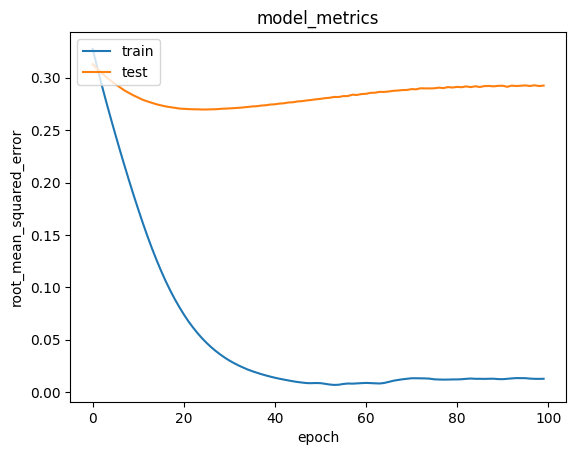

In [118]:
# Menampilkan grafik traning vs test
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [119]:
# Menampilkan nilai RMSE akhir dari data train dan test
train_rmse = history.history['root_mean_squared_error'][-1]
test_rmse = history.history['val_root_mean_squared_error'][-1]

print(f'RMSE Data Train: {train_rmse:.4f}')
print(f'RMSE Data Test: {test_rmse:.4f}')

RMSE Data Train: 0.0128
RMSE Data Test: 0.2925


Grafik RMSE menunjukkan bahwa model mampu belajar sangat baik pada data training, ditandai dengan penurunan error yang signifikan. Meskipun terdapat gap dengan data test, nilai RMSE test yang tetap rendah (0.3061) menandakan bahwa model masih memiliki performa prediksi yang cukup baik dalam konteks sistem rekomendasi.

## 14. Membuat variabel cellhpone_not_reviewed sebagai daftar cellphone untuk direkomendasikan pada pengguna

In [120]:
phone_df = phone_new
df = pd.read_csv('rating.csv')

# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
cellphone_reviewed_by_user = df[df.user_id == user_id]

cellphone_not_reviewed = phone_df[~phone_df['cellphone_id'].isin(cellphone_reviewed_by_user.cellphone_id.values)]['cellphone_id']
cellphone_not_reviewed = list(
    set(cellphone_not_reviewed)
    .intersection(set(cellphone_to_cellphone_encoded.keys()))
)

cellphone_not_reviewed = [[cellphone_to_cellphone_encoded.get(x)] for x in cellphone_not_reviewed]
user_encoder = user_to_user_encoded.get(user_id)
user_cellphone_array = np.hstack(
    ([[user_encoder]] * len(cellphone_not_reviewed), cellphone_not_reviewed)
)

## 15. Memperoleh hasil rekomendasi cellphone

In [121]:
ratings = model.predict(user_cellphone_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_cellphone_ids = [
    cellphone_encoded_to_cellphone.get(cellphone_not_reviewed[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('cellphone with high ratings from user')
print('----' * 8)

top_cellphone_user = (
    cellphone_reviewed_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .cellphone_id.values
)

cellphone_df_rows = phone_df[phone_df['cellphone_id'].isin(top_cellphone_user)]
for row in cellphone_df_rows.itertuples():
    print(row.brand, ':', row.model)

print('----' * 8)
print('Top 10 cellphone recommendation')
print('----' * 8)

recommended_cellphone = phone_df[phone_df['cellphone_id'].isin(recommended_cellphone_ids)]
for row in recommended_cellphone.itertuples():
    print(row.brand, ':', row.model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Showing recommendations for users: 35
cellphone with high ratings from user
--------------------------------
OnePlus : Nord 2T
OnePlus : Nord N20
Xiaomi : Poco F4
Apple : iPhone SE (2022)
Asus : Zenfone 8
--------------------------------
Top 10 cellphone recommendation
--------------------------------
Apple : iPhone XR
Google : Pixel 6a
Motorola : Moto G Pure
Motorola : Moto G Power (2022)
Sony : Xperia Pro
Google : Pixel 6  
OnePlus : 10 Pro
Samsung : Galaxy S22 Plus
OnePlus : 10T
Xiaomi : Redmi Note 11


# Kesimpulan

**Content-Based Filtering** memiliki kelebihan dalam memberikan rekomendasi personal tanpa bergantung pada data pengguna lain, namun kurang efektif jika fitur konten terbatas atau kurang relevan. Di sisi lain, **Collaborative Filtering** mampu menemukan pola tersembunyi dalam preferensi pengguna, tetapi memiliki kelemahan pada masalah cold start (untuk pengguna/item baru) dan membutuhkan data interaksi dalam jumlah besar. Pemilihan pendekatan tergantung pada kondisi data dan tujuan sistem rekomendasi yang dibangun.